In [3]:
import os
import pandas as pd
import spacy

# Load spaCy 
nlp = spacy.load("en_core_web_sm")

data_dir = "data"
corpus_data = []


for filename in sorted(os.listdir(data_dir)):
    if filename.endswith(".txt"):
        filepath = os.path.join(data_dir, filename)
        
        # Read text
        with open(filepath, "r", encoding="utf-8") as f:
            raw_text = f.read().strip()
        
        if not raw_text:
            print(f"⚠️  {filename} está vacío. Saltando.")
            continue

        # Process with spaCy
        doc = nlp(raw_text)
        
        # Extracting NER
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        # Save as a list of strings "text/LABEL"
        ner_str = " | ".join([f"{text}/{label}" for text, label in entities]) if entities else ""
        # Extract  anotations
        tokens = [token.text for token in doc]
        lemmas = [token.lemma_ for token in doc]
        pos_tags = [token.pos_ for token in doc]

        # Save row
        corpus_data.append({
            "Filename": filename,
            "Title": None,
            "Document": raw_text,
            "Text": None,
            "Tokens": " ".join(tokens),
            "Lemmas": " ".join(lemmas),
            "Parts-of-speech": " ".join(pos_tags),
            "Named_Entities": ner_str,  # ← nueva columna
            "Metadata": None
        })

# Convert to DataFrame and save
df = pd.DataFrame(corpus_data)
df.to_csv("corpus.csv", index=False, encoding="utf-8")


df.head()
# Count tokens in each file
df['Token_Count'] = df['Tokens'].str.split().str.len()

# Total tokens in corpus
total_tokens = df['Token_Count'].sum()
print(f" Total number of tokens in corpus: {total_tokens}")


 Total number of tokens in corpus: 12948


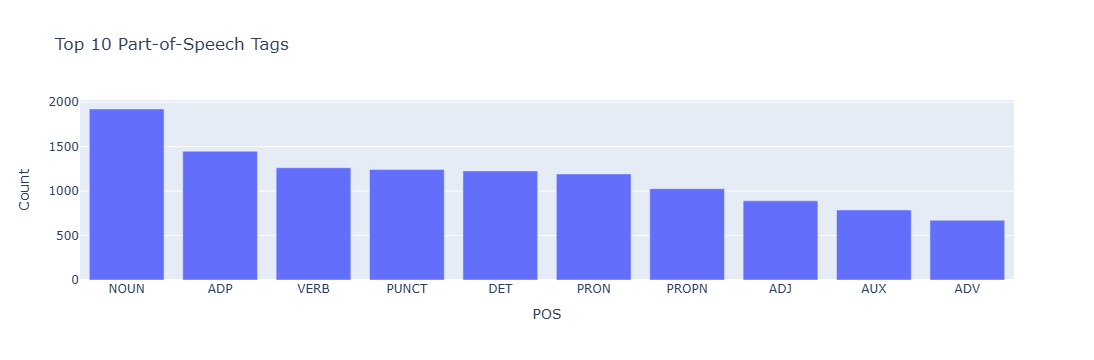

In [2]:
import plotly.express as px
from collections import Counter

# POS frequency
all_pos = [tag for pos_list in df['Parts-of-speech'] for tag in pos_list.split()]
pos_counts = Counter(all_pos)
pos_df = pd.DataFrame(pos_counts.items(), columns=['POS', 'Count']).sort_values('Count', ascending=False)

fig = px.bar(pos_df.head(10), x='POS', y='Count', title="Top 10 Part-of-Speech Tags")
fig.show()